# Codage des caractères et manipulation de fichiers binaires

Puisqu' un ordinateur ne manipule que des 0 et des 1, chaque caractère doit être codé en binaire (suite de bits 1 et 0). Donc, pour chaque caractère correspond un code numérique. Le codage ASCII (American Standard Code For Information Interchange) était utilisé par les premiers ordinateurs pour coder les lettres de la langue anglaise. 128 codes numériques (de 0 à 127) était suffisants pour représenter tous les caractères. Le code de la lettre "a" est 97 et celui de la lettre "A" est 65. Le codage des caractères se faisait sur 7 bits (2^7=128). Par exemple, le "a" est codé en binaire : 01100001.  Il n'est pas très commode de manipuler des représentaires binaires. Pour cela, on regroupe les séquences de 4 bits en une valeur hexadécimale. En effet, les valeurs binaires de '0000' à '1111' correspondent aux 16 valeurs hexadécimales.

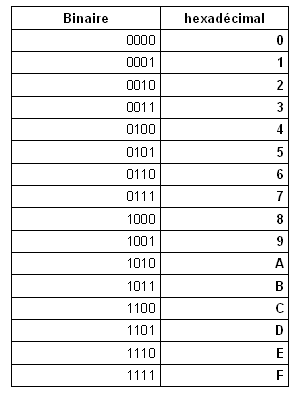

Ainsi, le code binaire du "a" 0110 0001 équivaut à 61 en codage héxadécimal. Le codage est ASCII a été étendu pour prendre en compte les caractères latins (accentués) et les caractères sont codés sur 8 bits (de 0 à 256=2^8). 

https://www.rapidtables.com/code/text/ascii-table.html. 

L'ISO, organisation internationale de normalisation, propose de son côté plusieurs variantes de codages adaptées aux différentes langues. La plus utilisée concerne les langues européennes occidentales. Il s'agit de l'ISO-8859-1, aussi nommé ISO-Latin1.

Cependant, 256 caractères ne suffisent pas pour représenter les lettres de tous les alphabets utilisés. Un nouveau standard a été introduit : Unicode. La table Unicode comporte la définition de 1,114,112 caractères. Chaque caractère a code universel unique qu'on appelle un point de code (Unicode code point). Pour connaitre le point de code d'un caractère dans Python, on utilise la fonction "ord" :



In [18]:
ord("é")

233

Pour connaitre le caractère qui correspond à code, on utilise la fonction "chr":

In [14]:
chr(1000)

'Ϩ'

Le codage le plus universellement utilisé se nomme UTF-8 (8 bits Unicode Transformation Format). Son principe est le suivant : une première série de caractères sont codés sur un octet. D'autres caractères sont codés sur deux octets. Les 128 premiers caractères de la table UTF-8 sont compatibles avec le codage ASCII. Ainsi le codage UTF-8 d'un texte ne comportant que des caractères présents dans la table ASCII sera le même que le codage ASCII de ce texte. Ce ne sera pas vrai pour un texte ISO-Latin-1.

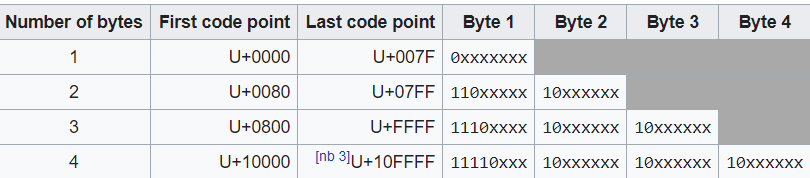

La méthode "encode()" de la classe "str" retourne le code utf-8 (codage par défaut) de la chaine de caractères. 

In [17]:
s="a"
print(s.encode())
s="é"
print(s.encode())
print(bin(0xc3a9))

b'a'
b'\xc3\xa9'
0b1100001110101001


La méthode "decode()" de la classe "str" permet de retourner le caractère correspondant à un code "utf-8". 

In [19]:
s=b'\xc3\xa9'
print(s.decode())

é


Pour plus d'informations sur le codage utf-8, consultez : https://fr.wikipedia.org/wiki/UTF-8

Exemple d'un fichier texte sauvegardé avec Notepad

# Manipulation d'un fichier en mode binaire

Pour ouvrir un fichier en mode binaire on met "rb" pour le lire et "wb" pour y écrire des données. Pour lire un fichier, on utlise la méthode "read()" en lui donnant le nombre d'octets qu'on désire lire. Exemple :

In [27]:
import os
os.chdir("C:\\Users\\User\\Documents\\Fichiers1")

with open("fichBin.txt","rb") as f:
    cb1=f.read(3)
    print(cb1)
    print(type(cb1))
    cs1=cb1.decode()
    print(cs1)
    print(type(cs1))
    cb2=f.read(2)
    cs2=cb2.decode()
    print(cs2)
    cb3=f.read(2)
    cs3=cb3.decode()
    print(cs3)

b'abc'
<class 'bytes'>
abc
<class 'str'>
é
ن


En mode binaire, "seek(pos,ref)" permet de positionner le curseur, "pos"  est la position, "ref" est la référence : 0 à partir du début du fichier, 2 à partir de la fin, 1 à partir de la position courante.


## Sauvegarde de données structurées

Le module pickle permet de sauvegarder des données en préservant leur structure. Il faut ouvrir le fichier en mode binaire.


In [28]:
import pickle
import os

os.chdir("C:\\Users\\User\\Documents\\Fichiers1")

a=2
dc={"cle1":1,"cle2":2}
liste=[1,2,4]
    
with open("fichPickle.txt","wb") as f:
    pickle.dump(a,f)
    pickle.dump(dc,f)
    pickle.dump(liste,f)
    
       

Récupération des données :

In [29]:
import pickle
import os

os.chdir("C:\\Users\\User\\Documents\\Fichiers1")

   
with open("fichPickle.txt","rb") as f:
    a=pickle.load(f)
    d=pickle.load(f)
    l=pickle.load(f)

print(a)
print(d)
print(l)

2
{'cle1': 1, 'cle2': 2}
[1, 2, 4]


### Sauvegarde de données structurées avec Json 

JSON (JavaScript Object Notation) est un format de données simplifié utilisé pour le stockage et la transmission des données. 
Le module "json" de Python permet de manipuler les données Json. La méthode "dumps()" permet de convertir un objet Python en une chaine de caractère au format Json.

In [30]:
import json
print(json.dumps({"name": "John", "age": 30}))
print(json.dumps(["apple", "bananas"]))
print(json.dumps(("apple", "bananas")))
print(json.dumps("hello"))
print(json.dumps(42))
print(json.dumps(31.76))
print(json.dumps(True))
print(json.dumps(False))
print(json.dumps(None))

{"name": "John", "age": 30}
["apple", "bananas"]
["apple", "bananas"]
"hello"
42
31.76
true
false
null


En fournissant à la méthode "dumps()", l'argument "indent", on peut afficher les données d'une manière plus organisée :

In [32]:
import json

x = {
  "name": "John",
  "age": 30,
  "married": True,
  "divorced": False,
  "children": ("Ann","Billy"),
  "pets": None,
  "cars": [
    {"model": "BMW 230", "mpg": 27.5},
    {"model": "Ford Edge", "mpg": 24.1}
  ]
}

print(json.dumps(x))
print(json.dumps(x, indent=4))

{"name": "John", "age": 30, "married": true, "divorced": false, "children": ["Ann", "Billy"], "pets": null, "cars": [{"model": "BMW 230", "mpg": 27.5}, {"model": "Ford Edge", "mpg": 24.1}]}
{
    "name": "John",
    "age": 30,
    "married": true,
    "divorced": false,
    "children": [
        "Ann",
        "Billy"
    ],
    "pets": null,
    "cars": [
        {
            "model": "BMW 230",
            "mpg": 27.5
        },
        {
            "model": "Ford Edge",
            "mpg": 24.1
        }
    ]
}


La methode "loads" permet de convertir un string "json" en un objet Python 

In [38]:
s='{"name": "John", "age": 30}' #Json Object base sur le princpe key/value pair equivalent a un dictionnaire d'un Python
print(type(s))
d=json.loads(s)
print(d)
print(type(d))
s='[1,2,3]' #Json Array equivalent a une liste ou un tuple
print(type(s))
l=json.loads(s)
t=tuple(l)
print(t)



<class 'str'>
{'name': 'John', 'age': 30}
<class 'dict'>
<class 'str'>
(1, 2, 3)


La methode "dump()" permet de stocker un objet Python dans un fichier texte au format Json. Et la méthode "load()" permet de lire un objet Json d'un fichier et le convertir en un objet Python. 

In [40]:
import json

x = {
  "name": "John",
  "age": 30,
  "married": True,
  "divorced": False,
  "children": ("Ann","Billy"),
  "pets": None,
  "cars": [
    {"model": "BMW 230", "mpg": 27.5},
    {"model": "Ford Edge", "mpg": 24.1}
  ]
}

sJson=json.dumps(x)
with open('jsonFile1.txt',"w") as f:
    f.write(sJson)

with open('jsonFile.txt',"w") as f:
    json.dump(x,f)
    
with open('jsonFile.txt',"r") as f:
    x=json.load(f)
print(x)  
print(json.dumps(x,indent=5))

{'name': 'John', 'age': 30, 'married': True, 'divorced': False, 'children': ['Ann', 'Billy'], 'pets': None, 'cars': [{'model': 'BMW 230', 'mpg': 27.5}, {'model': 'Ford Edge', 'mpg': 24.1}]}
{
     "name": "John",
     "age": 30,
     "married": true,
     "divorced": false,
     "children": [
          "Ann",
          "Billy"
     ],
     "pets": null,
     "cars": [
          {
               "model": "BMW 230",
               "mpg": 27.5
          },
          {
               "model": "Ford Edge",
               "mpg": 24.1
          }
     ]
}


### Ecriture sur un fichier CSV

In [42]:
def ecrireMatrice(M,f):
    for i in range(len(M)):
        for j in range(len(M[0])-1):
            f.write(str(M[i][j])+",")
        f.write(str(M[i][j+1]))    
        f.write("\n")            

M=[[1,2,3],[1,2,3],[1,2,3],[1,2,3]]
import os
os.chdir("C:\\Users\\User\\Documents\\Fichiers1")       
with open("fichierMatriceCSV.txt","w") as f:
    ecrireMatrice(M,f)